In [1]:
from utils import *
from DGD import *
from gradient_tracking import *
from dualdec import *

## Load data

Nb agents : 5
Nb data points : 100
Nb selected points : 10
Points per agent : 20.0



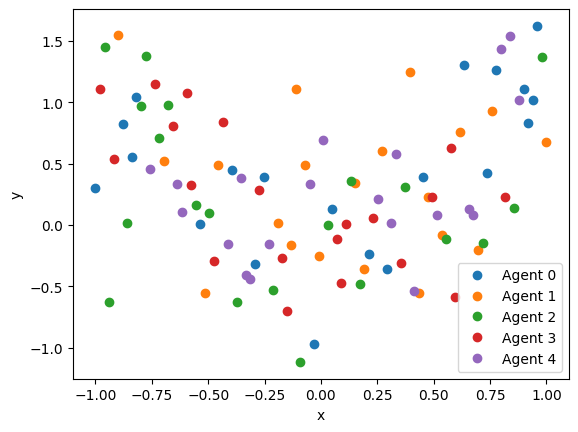

In [6]:
# Generate the data
a = 5
n = 100
m = int(np.floor(np.sqrt(n)))
agent_x, agent_y, x_selected, y_selected, selected_points, selected_points_agents, K, x, y = get_agents_from_pickle(
    'first_database.pkl', a, n, m)
print(f'Nb agents : {a}')
print(f'Nb data points : {n}')
print(f'Nb selected points : {m}')
print(f'Points per agent : {n/a}\n')

# # Data visualization per agent
for i in range(a):
    plt.plot(agent_x[i], agent_y[i], 'o', label=f'Agent {i}')
# plt.plot(x, y, 'o', label='Data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


In [7]:
def visualize_predict(alpha_list, alpha_optim_linalg, alpha_optim, agent_x, agent_y, x_selected):
    # Data visualization
    # Y = np.linalg.norm(alpha_list - alpha_optim, axis=1)
    # unpack the list of alpha to get for each agent the evolution of alpha
    agent_1 = np.linalg.norm(np.array(
        [alpha_list[i][0] for i in range(len(alpha_list))]) - alpha_optim_linalg, axis=1)
    agent_2 = np.linalg.norm(np.array(
        [alpha_list[i][1] for i in range(len(alpha_list))]) - alpha_optim_linalg, axis=1)
    agent_3 = np.linalg.norm(np.array(
        [alpha_list[i][2] for i in range(len(alpha_list))]) - alpha_optim_linalg, axis=1)
    agent_4 = np.linalg.norm(np.array(
        [alpha_list[i][3] for i in range(len(alpha_list))]) - alpha_optim_linalg, axis=1)
    agent_5 = np.linalg.norm(np.array(
        [alpha_list[i][4] for i in range(len(alpha_list))]) - alpha_optim_linalg, axis=1)
    plt.plot(agent_1, label='Agent 1', color='blue')
    plt.plot(agent_2, label='Agent 2', color='red')
    plt.plot(agent_3, label='Agent 3', color='green')
    plt.plot(agent_4, label='Agent 4', color='orange')
    plt.plot(agent_5, label='Agent 5', color='purple')
    plt.xlabel('Iterations')
    plt.ylabel('Optimality gap (norm)')
    plt.xscale("log")
    plt.yscale("log")
    plt.grid()
    plt.show()
    # Plot the consensus alpha_agents - alpha_agents_mean
    plt.figure(2)
    alpha_mean = np.array([alpha_list[i].mean(axis=0) for i in range(len(alpha_list))])
    agent_1_cons = np.linalg.norm(np.array(
        [alpha_list[i][0] for i in range(len(alpha_list))]) - alpha_mean, axis=1)
    agent_2_cons = np.linalg.norm(np.array(
        [alpha_list[i][1] for i in range(len(alpha_list))]) - alpha_mean, axis=1)
    agent_3_cons = np.linalg.norm(np.array(
        [alpha_list[i][2] for i in range(len(alpha_list))]) - alpha_mean, axis=1)
    agent_4_cons = np.linalg.norm(np.array(
        [alpha_list[i][3] for i in range(len(alpha_list))]) - alpha_mean, axis=1)
    agent_5_cons = np.linalg.norm(np.array(
        [alpha_list[i][4] for i in range(len(alpha_list))]) - alpha_mean, axis=1)
    plt.plot(agent_1_cons, label='Agent 1', color='blue')
    plt.plot(agent_2_cons, label='Agent 2', color='red')
    plt.plot(agent_3_cons, label='Agent 3', color='green')
    plt.plot(agent_4_cons, label='Agent 4', color='orange')
    plt.plot(agent_5_cons, label='Agent 5', color='purple')
    plt.xlabel('Iterations')
    plt.ylabel('Consensus')
    plt.xscale("log")
    plt.yscale("log")
    plt.grid()
    plt.show()

    # Plot selected points and the prediction of the model with the alpha optimal 
    plt.figure(0)
    for i in range(a):
        plt.plot(agent_x[i], agent_y[i], 'o', label=f'Agent {i+1}')
    x_predict = np.linspace(-1, 1, 250)
    K_f = kernel_matrix(x_predict, x_selected)
    fx_predict = K_f @ alpha_optim
    plt.plot(x_predict, fx_predict, label='Prediction')
    plt.grid()
    plt.legend()
    plt.show()
    

- Plot the convergence varying the graph structure (from a line to a small-world graph to a fully
connected one)

- Visualize the obtained functions by testing them on a uniform grid of dimension nt = 250, that is
    for the points $x_0$
    computed as,
    x_prime=np.linspace(-1,1,nt)

- Try to break convergence by adding **directed communication, package losses, asynchronicity**.

- (Optional) Recover convergence with the push-sum protocol in the case of directed communication.

- In all the above please justify what you see by the theory that you have studied in class.

- Increase n as much as you can, maintaining $m=\sqrt{n}$, and redo the above. Here you are also
    allowed to increase the number of agents if needed. In this case, the centralized solution may not
    be computable, so then plot other metrics to gauge convergence.
    The team that has reached the highest n gets one bonus point.
- How convergence depends on $n$?


## Gradient Tracking

Compute the alpha optimal....
Time to compute alpha optimal : 0.005001544952392578

alpha optimal : [-0.30239352  1.10421271  0.41440963  0.26405763  0.3794205  -0.28851544
  0.42401528 -0.29773228 -0.27764269 -0.31636688]

Compute the alpha optimal with the gradient tracking algorithm....
[[0.  0.5 0.  0.  0.5]
 [0.5 0.  0.5 0.  0. ]
 [0.  0.5 0.  0.5 0. ]
 [0.  0.  0.5 0.  0.5]
 [0.5 0.  0.  0.5 0. ]]


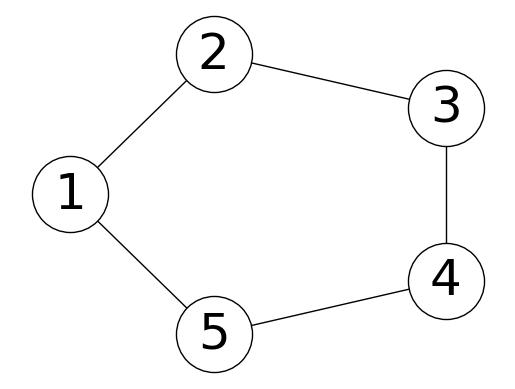

TEST MATRICE DOUBLE STO :  True


100%|██████████| 50000/50000 [00:09<00:00, 5220.73it/s]


alpha optimal with gradient tracking : [ 37.85858052 -45.70518457 -26.01952972 -14.02929131  -8.29420785
 -18.79197669 -14.15007267  24.69607902  18.15080597  11.47879239]
Time to compute alpha optimal with gradient tracking : 9.585851669311523
Total iterations : 49999



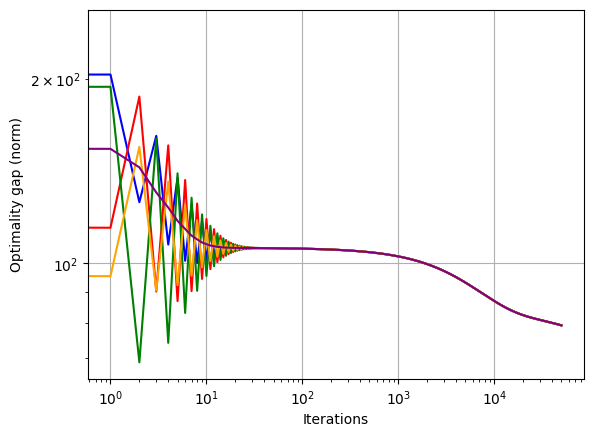

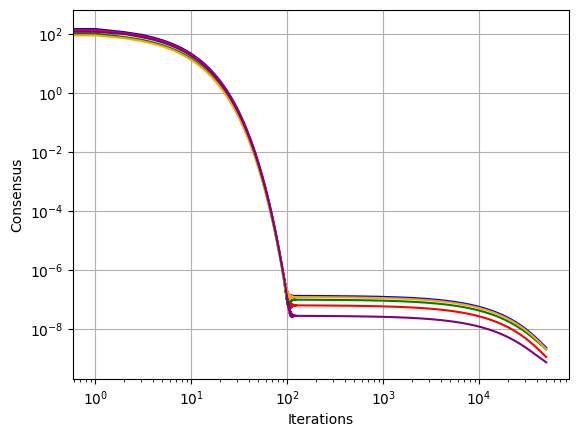

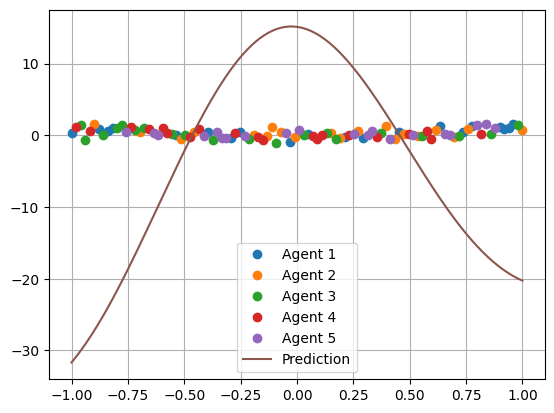

In [21]:
# Compute the alpha optimal
print("Compute the alpha optimal....")
sigma = 0.5
mu = 1
start = time.time()
alpha_optim = compute_alpha(x, y, x_selected, sigma, mu)
end = time.time()
print(f'Time to compute alpha optimal : {end - start}\n')
print(f'alpha optimal : {alpha_optim}\n')

# Compute the alpha optimal with the gradient tracking algorithm
print("Compute the alpha optimal with the gradient tracking algorithm....")
lr = 0.000001
max_iter = 50000

# create the weight matrix
ind = [(0,1), (1,2), (2,3), (3,4), (4,0)]
W = create_W(ind, 5, auto=False)
print(W)
visual_graph(ind)

print("TEST MATRICE DOUBLE STO : ", is_double_sto(W))
start = time.time()
alpha_optim_gt, tot_ite, alpha_list = gradient_tracking_v2(
    x, y, selected_points, selected_points_agents, K, sigma, mu, lr, W, max_iter=max_iter)
end = time.time()
print(f'alpha optimal with gradient tracking : {alpha_optim_gt}')
print(
    f'Time to compute alpha optimal with gradient tracking : {end - start}')
print(f'Total iterations : {tot_ite}\n')

visualize_predict(alpha_list, alpha_optim, alpha_optim_gt, agent_x, agent_y, x_selected)

Compute the alpha optimal....
Time to compute alpha optimal : 0.006003856658935547

alpha optimal : [-0.30239352  1.10421271  0.41440963  0.26405763  0.3794205  -0.28851544
  0.42401528 -0.29773228 -0.27764269 -0.31636688]

Compute the alpha optimal with the gradient tracking algorithm....
[[0.         0.33353983 0.         0.         0.66646017]
 [0.33343714 0.         0.49968932 0.16687354 0.        ]
 [0.         0.5        0.         0.5        0.        ]
 [0.         0.16687354 0.49968932 0.         0.33343714]
 [0.66646017 0.         0.         0.33353983 0.        ]]


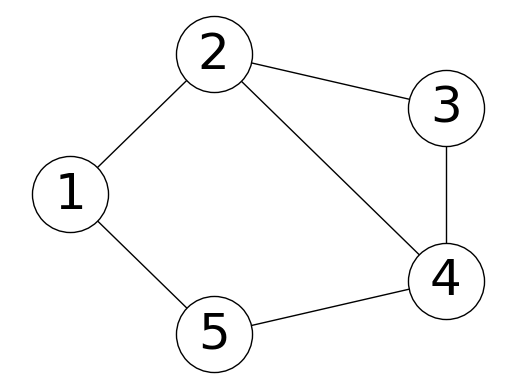

TEST MATRICE DOUBLE STO :  True


100%|██████████| 50000/50000 [00:10<00:00, 4984.13it/s]


alpha optimal with gradient tracking : [ 54.20864472 -12.47057719 -35.10165859  36.86045309   6.67522994
 -13.83134731   7.44551832  -6.8262631  -60.68643253  20.56321356]
Time to compute alpha optimal with gradient tracking : 10.038849592208862
Total iterations : 49999



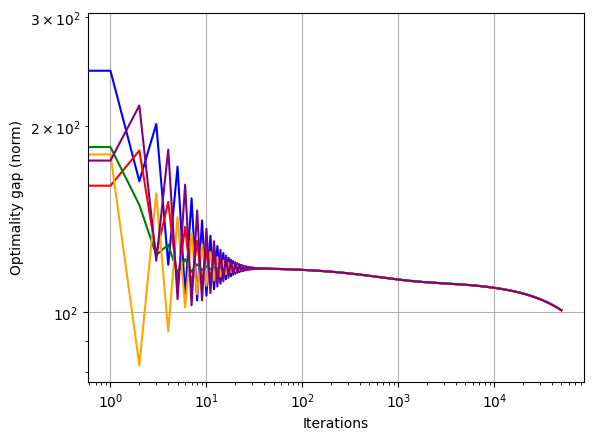

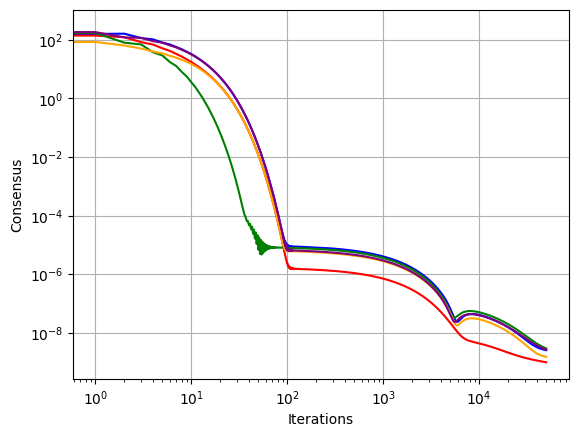

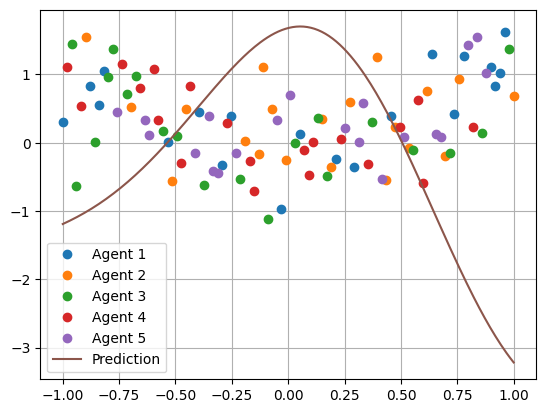

In [22]:
# Compute the alpha optimal
print("Compute the alpha optimal....")
sigma = 0.5
mu = 1
start = time.time()
alpha_optim = compute_alpha(x, y, x_selected, sigma, mu)
end = time.time()
print(f'Time to compute alpha optimal : {end - start}\n')
print(f'alpha optimal : {alpha_optim}\n')

# Compute the alpha optimal with the gradient tracking algorithm
print("Compute the alpha optimal with the gradient tracking algorithm....")
lr = 0.00001
max_iter = 50000

# create the weight matrix
ind = [(0,1), (1,2), (1, 3), (2,3), (3,4), (4,0)]
W = create_W(ind, 5, auto=False)
print(W)
visual_graph(ind)

print("TEST MATRICE DOUBLE STO : ", is_double_sto(W))
start = time.time()
alpha_optim_gt, tot_ite, alpha_list = gradient_tracking_v2(
    x, y, selected_points, selected_points_agents, K, sigma, mu, lr, W, max_iter=max_iter)
end = time.time()
print(f'alpha optimal with gradient tracking : {alpha_optim_gt}')
print(
    f'Time to compute alpha optimal with gradient tracking : {end - start}')
print(f'Total iterations : {tot_ite}\n')

visualize_predict(alpha_list, alpha_optim, alpha_optim_gt, agent_x, agent_y, x_selected)

Compute the alpha optimal....
Time to compute alpha optimal : 0.006511688232421875

alpha optimal : [-0.30239352  1.10421271  0.41440963  0.26405763  0.3794205  -0.28851544
  0.42401528 -0.29773228 -0.27764269 -0.31636688]

Compute the alpha optimal with the gradient tracking algorithm....
[[0.   0.25 0.25 0.25 0.25]
 [0.25 0.   0.25 0.25 0.25]
 [0.25 0.25 0.   0.25 0.25]
 [0.25 0.25 0.25 0.   0.25]
 [0.25 0.25 0.25 0.25 0.  ]]


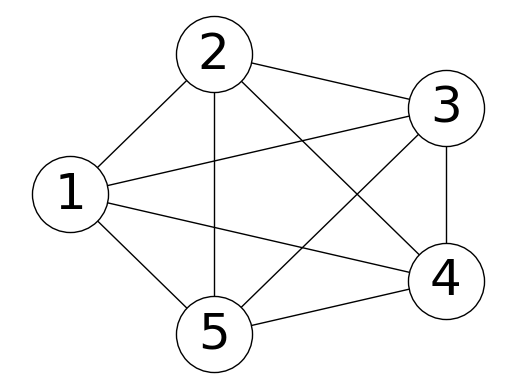

TEST MATRICE DOUBLE STO :  True


100%|██████████| 50000/50000 [00:08<00:00, 5807.79it/s]


alpha optimal with gradient tracking : [-0.30239353  1.10421271  0.4144096   0.26405762  0.37942046 -0.28851547
  0.42401536 -0.29773225 -0.27764271 -0.31636684]
Time to compute alpha optimal with gradient tracking : 8.61563777923584
Total iterations : 49999



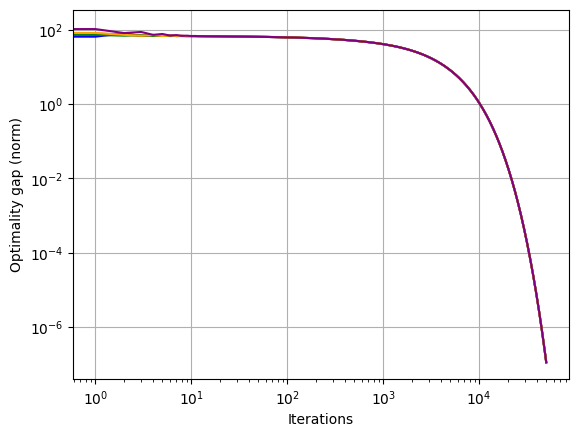

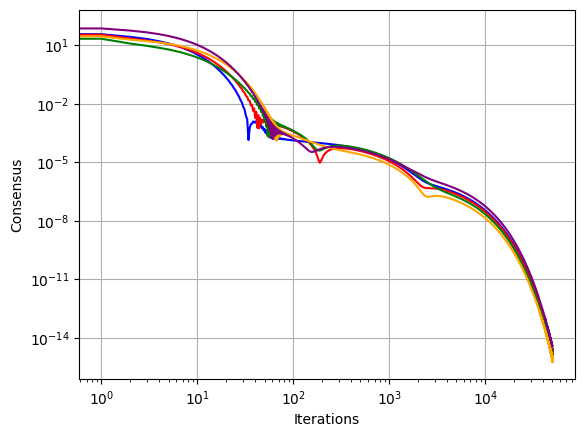

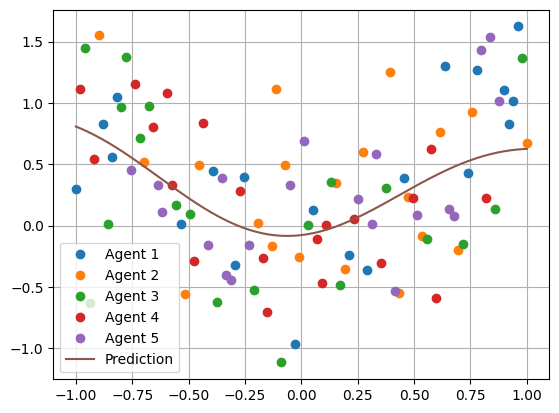

In [19]:
# Compute the alpha optimal
print("Compute the alpha optimal....")
sigma = 0.5
mu = 1
start = time.time()
alpha_optim = compute_alpha(x, y, x_selected, sigma, mu)
end = time.time()
print(f'Time to compute alpha optimal : {end - start}\n')
print(f'alpha optimal : {alpha_optim}\n')

# Compute the alpha optimal with the gradient tracking algorithm
print("Compute the alpha optimal with the gradient tracking algorithm....")
lr = 0.002
max_iter = 50000

# create the weight matrix
ind = [(0,1), (0, 2), (0, 3),  (1,2), (1, 3), (1, 4), (2,3), (2, 4), (3,4), (4,0)]
W = create_W(ind, 5, auto=False)
print(W)
visual_graph(ind)

print("TEST MATRICE DOUBLE STO : ", is_double_sto(W))
start = time.time()
alpha_optim_gt, tot_ite, alpha_list = gradient_tracking_v2(
    x, y, selected_points, selected_points_agents, K, sigma, mu, lr, W, max_iter=max_iter)
end = time.time()
print(f'alpha optimal with gradient tracking : {alpha_optim_gt}')
print(
    f'Time to compute alpha optimal with gradient tracking : {end - start}')
print(f'Total iterations : {tot_ite}\n')

visualize_predict(alpha_list, alpha_optim, alpha_optim_gt, agent_x, agent_y, x_selected)

Compute the alpha optimal....
Time to compute alpha optimal : 0.01099705696105957

alpha optimal : [-0.30239352  1.10421271  0.41440963  0.26405763  0.3794205  -0.28851544
  0.42401528 -0.29773228 -0.27764269 -0.31636688]

Compute the alpha optimal with the gradient tracking algorithm....
[[0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [9.99000638e-01 0.00000000e+00 3.33120544e-04 3.33120544e-04
  3.33120544e-04]
 [0.00000000e+00 3.33287528e-04 0.00000000e+00 4.99833356e-01
  4.99833356e-01]
 [0.00000000e+00 3.33287528e-04 4.99833356e-01 0.00000000e+00
  4.99833356e-01]
 [0.00000000e+00 3.33287528e-04 4.99833356e-01 4.99833356e-01
  0.00000000e+00]]


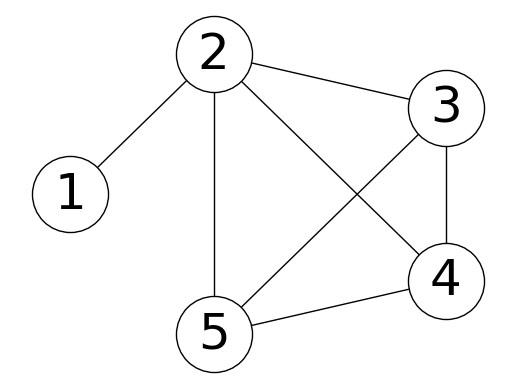

TEST MATRICE DOUBLE STO :  True


100%|██████████| 10000/10000 [00:01<00:00, 5393.42it/s]


alpha optimal with gradient tracking : [-3.70225804e+166 -2.74295753e+166 -2.52835674e+166 -2.99268500e+166
 -2.67414236e+166 -3.70354089e+166 -2.47889905e+166 -3.70960574e+166
 -3.69591506e+166 -3.71827736e+166]
Time to compute alpha optimal with gradient tracking : 1.8591163158416748
Total iterations : 9999



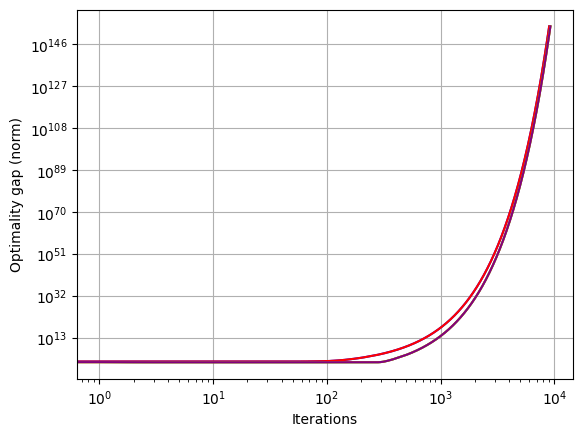

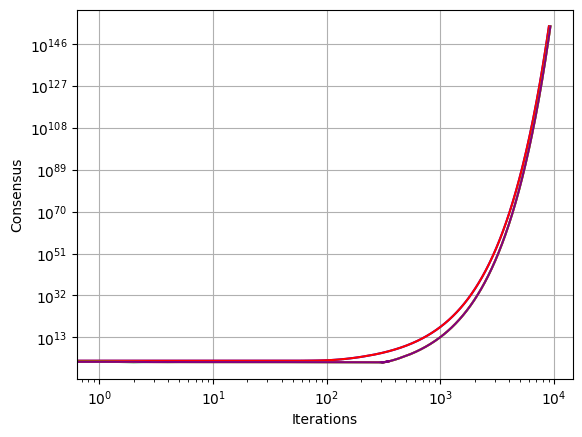

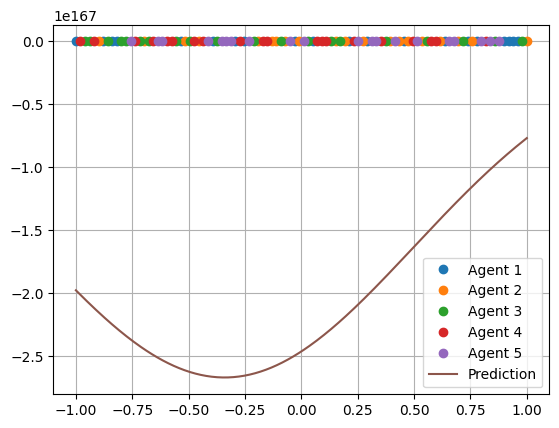

In [23]:
# Compute the alpha optimal
print("Compute the alpha optimal....")
sigma = 0.5
mu = 1
start = time.time()
alpha_optim = compute_alpha(x, y, x_selected, sigma, mu)
end = time.time()
print(f'Time to compute alpha optimal : {end - start}\n')
print(f'alpha optimal : {alpha_optim}\n')

# Compute the alpha optimal with the gradient tracking algorithm
print("Compute the alpha optimal with the gradient tracking algorithm....")
lr = 0.00001
max_iter = 10000

# create the weight matrix
ind = [(0,1), (1,2), (1, 3), (1, 4), (2,3), (2, 4), (3,4)]
W = create_W(ind, 5, auto=False)
print(W)
visual_graph(ind)

print("TEST MATRICE DOUBLE STO : ", is_double_sto(W))
start = time.time()
alpha_optim_gt, tot_ite, alpha_list = gradient_tracking_v2(
    x, y, selected_points, selected_points_agents, K, sigma, mu, lr, W, max_iter=max_iter)
end = time.time()
print(f'alpha optimal with gradient tracking : {alpha_optim_gt}')
print(
    f'Time to compute alpha optimal with gradient tracking : {end - start}')
print(f'Total iterations : {tot_ite}\n')

visualize_predict(alpha_list, alpha_optim, alpha_optim_gt, agent_x, agent_y, x_selected)

## Dual decomposition


Compute the alpha optimal....
Time to compute alpha optimal : 0.004998445510864258

alpha optimal : [-0.30239352  1.10421271  0.41440963  0.26405763  0.3794205  -0.28851544
  0.42401528 -0.29773228 -0.27764269 -0.31636688]

[[0.  0.5 0.  0.  0.5]
 [0.5 0.  0.5 0.  0. ]
 [0.  0.5 0.  0.5 0. ]
 [0.  0.  0.5 0.  0.5]
 [0.5 0.  0.  0.5 0. ]]


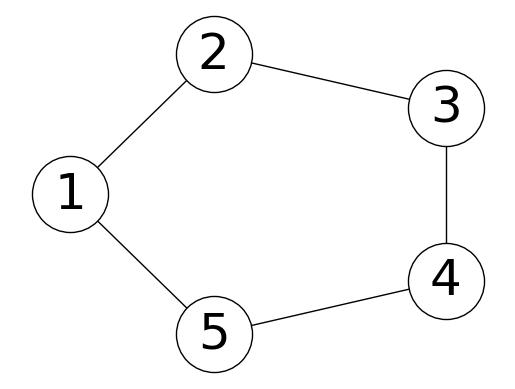

TEST MATRICE DOUBLE STO :  True


100%|██████████| 10000/10000 [00:01<00:00, 6482.45it/s]


alpha optimal with dual decomposition : [-0.12817012  0.61493185  0.25325718  0.14122171  0.22441697 -0.15149019
  0.26179109 -0.15335838 -0.14858909 -0.14994186]
Time to compute alpha optimal with dual decomposition : 1.546628475189209


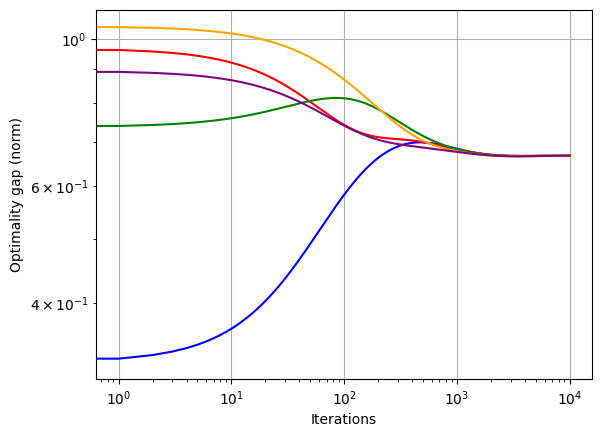

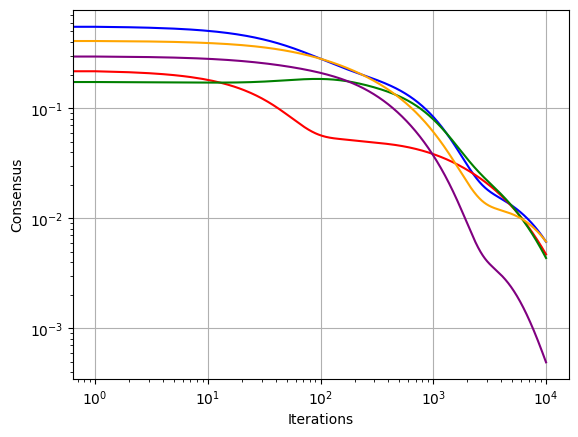

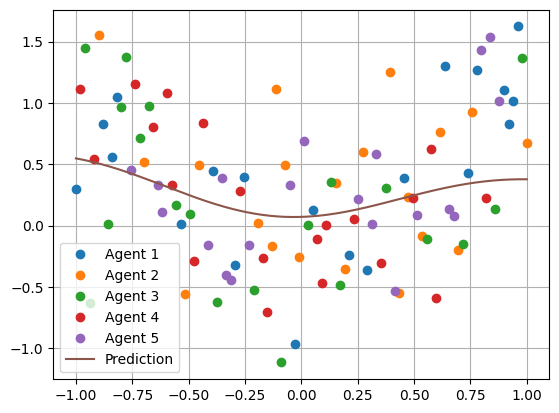

In [25]:
sigma=0.5
mu=1
lr = 0.01
max_iter = 10000
# Compute the alpha optimal
print("Compute the alpha optimal....")
start = time.time()
alpha_optim = compute_alpha(x, y, x_selected, sigma, mu)
end = time.time()
print(f'Time to compute alpha optimal : {end - start}\n')
print(f'alpha optimal : {alpha_optim}\n')

# create the weight matrix
ind = [(0,1), (1,2), (2,3), (3,4), (4,0)]
W = create_W(ind, 5, auto=False)
print(W)
visual_graph(ind)
# W = np.array([[1/3, 1/3, 0, 0, 1/3],
#               [1/3, 1/3, 1/3, 0, 0],
#               [0, 1/3, 1/3, 1/3, 0],
#               [0, 0, 1/3, 1/3, 1/3],
#               [1/3, 0, 0, 1/3, 1/3]])
print("TEST MATRICE DOUBLE STO : ", is_double_sto(W))
# Compute the alpha optimal with the dual decomposition algorithm
start = time.time()
alpha_optim_dualdec, alpha_list, alpha_mean_list = dualDec(
    x, y, selected_points, selected_points_agents,
    K, sigma, mu, lr, W, max_iter=max_iter, lamb0=0.
)
end = time.time()
print(f'alpha optimal with dual decomposition : {alpha_optim_dualdec}')
print(
    f'Time to compute alpha optimal with dual decomposition : {end - start}')
# print(f'Total iterations : {tot_ite}\n')

visualize_predict(alpha_list, alpha_optim, alpha_optim_dualdec, agent_x, agent_y, x_selected)


Compute the alpha optimal....
Time to compute alpha optimal : 0.0049991607666015625

alpha optimal : [-0.30239352  1.10421271  0.41440963  0.26405763  0.3794205  -0.28851544
  0.42401528 -0.29773228 -0.27764269 -0.31636688]

[[0.         0.33353983 0.         0.         0.66646017]
 [0.33343714 0.         0.49968932 0.16687354 0.        ]
 [0.         0.5        0.         0.5        0.        ]
 [0.         0.16687354 0.49968932 0.         0.33343714]
 [0.66646017 0.         0.         0.33353983 0.        ]]


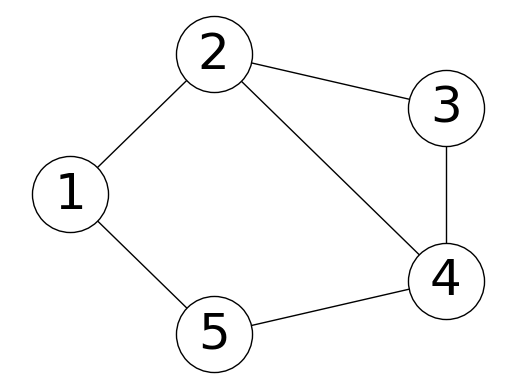

TEST MATRICE DOUBLE STO :  True


100%|██████████| 10000/10000 [00:01<00:00, 6740.66it/s]


alpha optimal with dual decomposition : [-0.12803001  0.61552064  0.25303692  0.14087467  0.22414982 -0.15157894
  0.26158765 -0.15342287 -0.14870153 -0.14990529]
Time to compute alpha optimal with dual decomposition : 1.4880459308624268


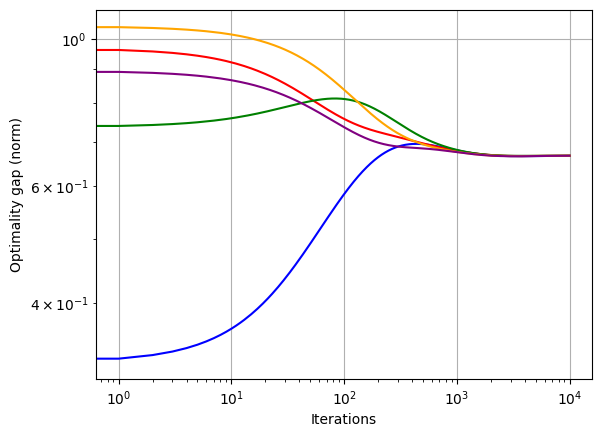

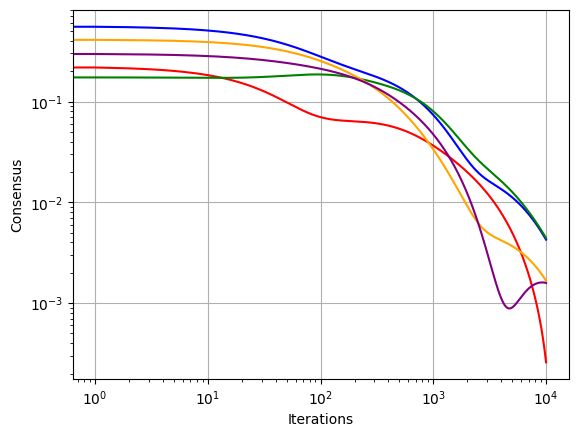

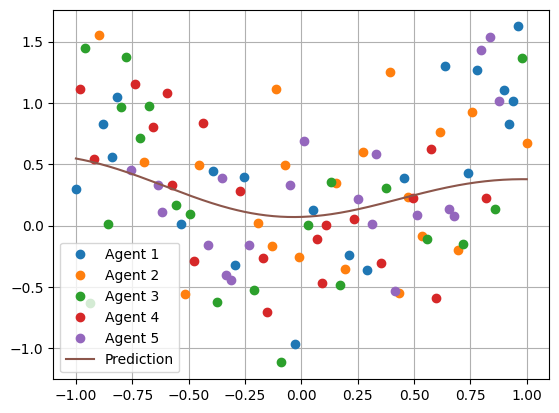

In [29]:
sigma=0.5
mu=1
lr = 0.01
max_iter = 10000
# Compute the alpha optimal
print("Compute the alpha optimal....")
start = time.time()
alpha_optim = compute_alpha(x, y, x_selected, sigma, mu)
end = time.time()
print(f'Time to compute alpha optimal : {end - start}\n')
print(f'alpha optimal : {alpha_optim}\n')

# create the weight matrix
ind = [(0,1), (1,2), (1, 3), (2,3), (3,4), (4,0)]
W = create_W(ind, 5, auto=False)
print(W)
visual_graph(ind)
# W = np.array([[1/3, 1/3, 0, 0, 1/3],
#               [1/3, 1/3, 1/3, 0, 0],
#               [0, 1/3, 1/3, 1/3, 0],
#               [0, 0, 1/3, 1/3, 1/3],
#               [1/3, 0, 0, 1/3, 1/3]])
print("TEST MATRICE DOUBLE STO : ", is_double_sto(W))
# Compute the alpha optimal with the dual decomposition algorithm
start = time.time()
alpha_optim_dualdec, alpha_list, alpha_mean_list = dualDec(
    x, y, selected_points, selected_points_agents,
    K, sigma, mu, lr, W, max_iter=max_iter, lamb0=0.
)
end = time.time()
print(f'alpha optimal with dual decomposition : {alpha_optim_dualdec}')
print(
    f'Time to compute alpha optimal with dual decomposition : {end - start}')
# print(f'Total iterations : {tot_ite}\n')

visualize_predict(alpha_list, alpha_optim, alpha_optim_dualdec, agent_x, agent_y, x_selected)


Compute the alpha optimal....
Time to compute alpha optimal : 0.00899815559387207

alpha optimal : [-0.87114742  1.43400865  0.27609525  0.74406217  0.44613152 -0.15763508
  0.21572411 -0.24010829 -0.07604519 -0.56900004]

[[0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [9.99000638e-01 0.00000000e+00 3.33120544e-04 3.33120544e-04
  3.33120544e-04]
 [0.00000000e+00 3.33287528e-04 0.00000000e+00 4.99833356e-01
  4.99833356e-01]
 [0.00000000e+00 3.33287528e-04 4.99833356e-01 0.00000000e+00
  4.99833356e-01]
 [0.00000000e+00 3.33287528e-04 4.99833356e-01 4.99833356e-01
  0.00000000e+00]]


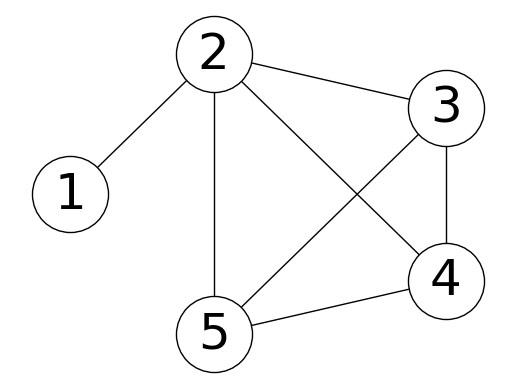

TEST MATRICE DOUBLE STO :  True


100%|██████████| 10000/10000 [00:01<00:00, 6622.87it/s]


alpha optimal with dual decomposition : [-0.39879863  1.10240078  0.34830339  0.35300688  0.36381977 -0.23491113
  0.34081257 -0.25948134 -0.20931508 -0.34409231]
Time to compute alpha optimal with dual decomposition : 1.51401686668396


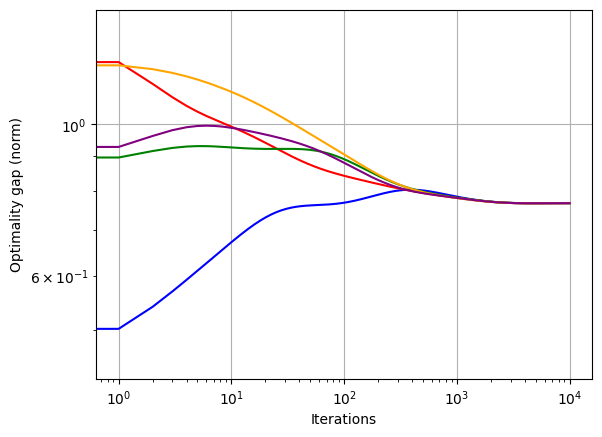

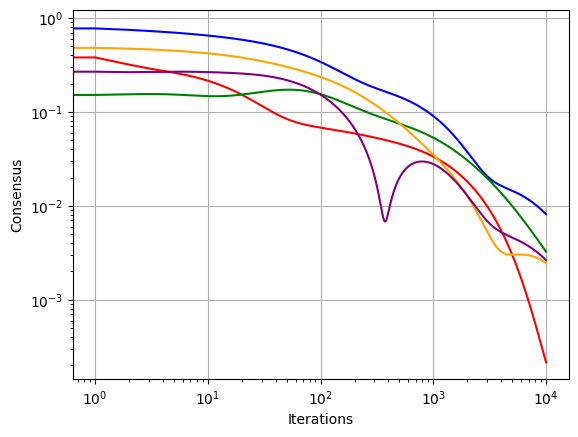

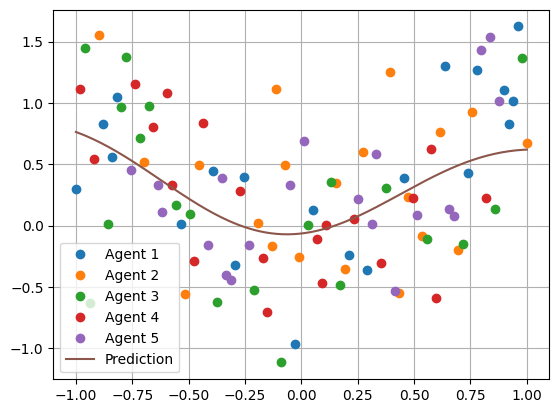

In [28]:
sigma=0.5
mu=0.1
lr = 0.01
max_iter = 10000
# Compute the alpha optimal
print("Compute the alpha optimal....")
start = time.time()
alpha_optim = compute_alpha(x, y, x_selected, sigma, mu)
end = time.time()
print(f'Time to compute alpha optimal : {end - start}\n')
print(f'alpha optimal : {alpha_optim}\n')

# create the weight matrix
ind = [(0,1), (1,2), (1, 3), (1, 4), (2,3), (2, 4), (3,4)]
W = create_W(ind, 5, auto=False)
print(W)
visual_graph(ind)
# W = np.array([[1/3, 1/3, 0, 0, 1/3],
#               [1/3, 1/3, 1/3, 0, 0],
#               [0, 1/3, 1/3, 1/3, 0],
#               [0, 0, 1/3, 1/3, 1/3],
#               [1/3, 0, 0, 1/3, 1/3]])
print("TEST MATRICE DOUBLE STO : ", is_double_sto(W))
# Compute the alpha optimal with the dual decomposition algorithm
start = time.time()
alpha_optim_dualdec, alpha_list, alpha_mean_list = dualDec(
    x, y, selected_points, selected_points_agents,
    K, sigma, mu, lr, W, max_iter=max_iter, lamb0=0.
)
end = time.time()
print(f'alpha optimal with dual decomposition : {alpha_optim_dualdec}')
print(
    f'Time to compute alpha optimal with dual decomposition : {end - start}')
# print(f'Total iterations : {tot_ite}\n')

visualize_predict(alpha_list, alpha_optim, alpha_optim_dualdec, agent_x, agent_y, x_selected)


Compute the alpha optimal....
Time to compute alpha optimal : 0.008512258529663086

alpha optimal : [-0.30239352  1.10421271  0.41440963  0.26405763  0.3794205  -0.28851544
  0.42401528 -0.29773228 -0.27764269 -0.31636688]

[[0.   0.25 0.25 0.25 0.25]
 [0.25 0.   0.25 0.25 0.25]
 [0.25 0.25 0.   0.25 0.25]
 [0.25 0.25 0.25 0.   0.25]
 [0.25 0.25 0.25 0.25 0.  ]]


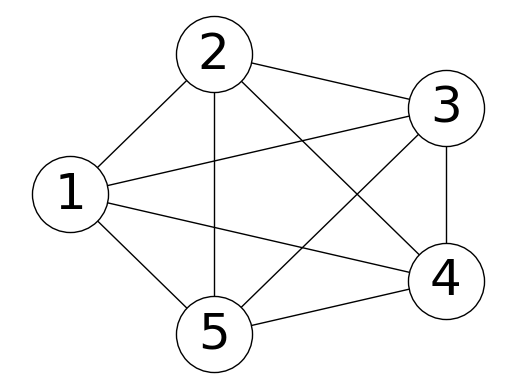

TEST MATRICE DOUBLE STO :  True


100%|██████████| 10000/10000 [00:01<00:00, 6718.96it/s]


alpha optimal with dual decomposition : [-0.12791282  0.61600624  0.2526056   0.14054074  0.22374184 -0.15155408
  0.26114984 -0.15338688 -0.14868806 -0.14982715]
Time to compute alpha optimal with dual decomposition : 1.4923248291015625


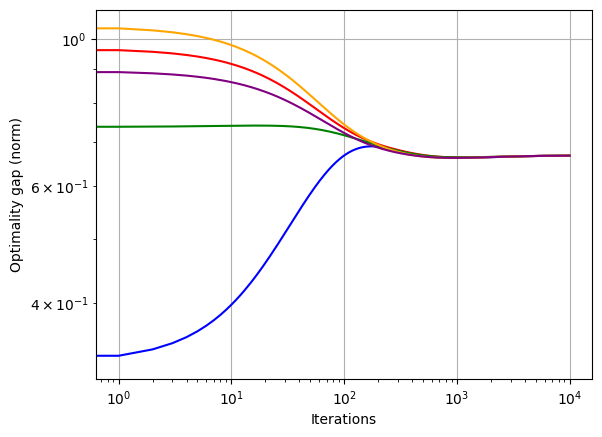

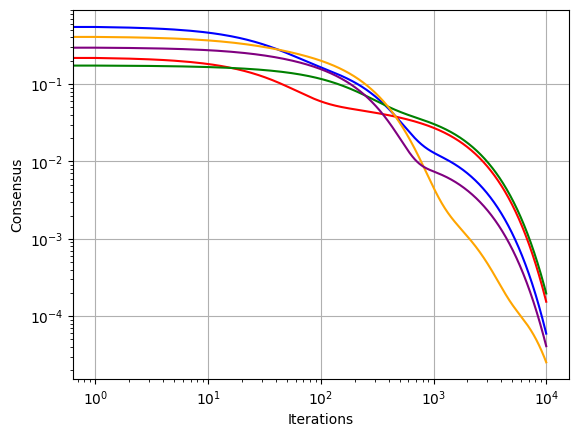

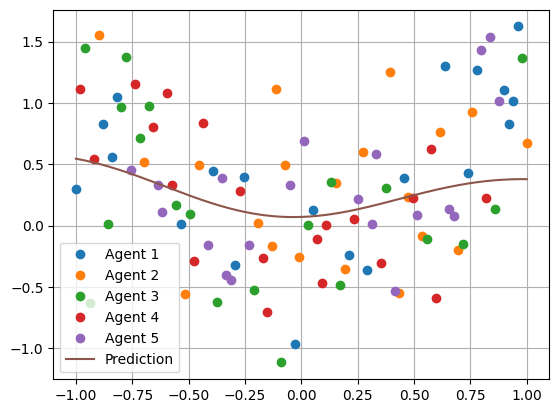

In [30]:
sigma=0.5
mu=1
lr = 0.01
max_iter = 10000
# Compute the alpha optimal
print("Compute the alpha optimal....")
start = time.time()
alpha_optim = compute_alpha(x, y, x_selected, sigma, mu)
end = time.time()
print(f'Time to compute alpha optimal : {end - start}\n')
print(f'alpha optimal : {alpha_optim}\n')

# create the weight matrix
ind = [(0,1), (0, 2), (0, 3),  (1,2), (1, 3), (1, 4), (2,3), (2, 4), (3,4), (4,0)]
W = create_W(ind, 5, auto=False)
print(W)
visual_graph(ind)
print("TEST MATRICE DOUBLE STO : ", is_double_sto(W))
# Compute the alpha optimal with the dual decomposition algorithm
start = time.time()
alpha_optim_dualdec, alpha_list, alpha_mean_list = dualDec(
    x, y, selected_points, selected_points_agents,
    K, sigma, mu, lr, W, max_iter=max_iter, lamb0=0.
)
end = time.time()
print(f'alpha optimal with dual decomposition : {alpha_optim_dualdec}')
print(
    f'Time to compute alpha optimal with dual decomposition : {end - start}')
# print(f'Total iterations : {tot_ite}\n')

visualize_predict(alpha_list, alpha_optim, alpha_optim_dualdec, agent_x, agent_y, x_selected)


## FedAvg

X shape :  (5, 20)
Y shape :  (5, 20)
Compute the alpha optimal....
Time to compute alpha optimal : 0.004002809524536133

alpha optimal : [ 0.66056563  0.31552733  0.1869301   0.11363063 -0.08957134 -0.41939376
 -0.63202064 -0.42173679  0.31707605  1.37274736]

K shape :  (10, 10)
Kim shape :  (20, 10)


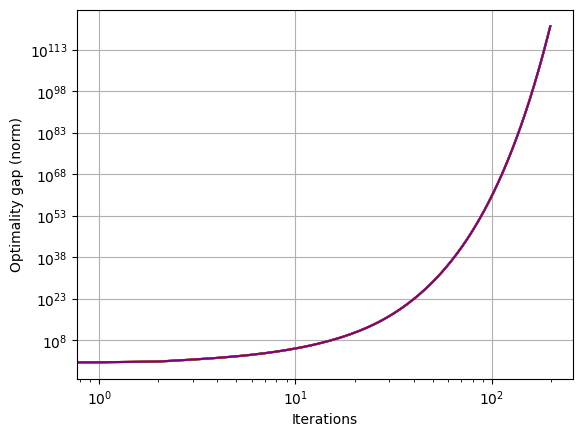

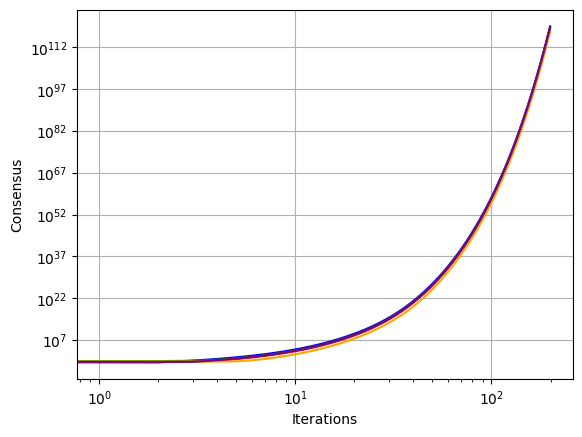

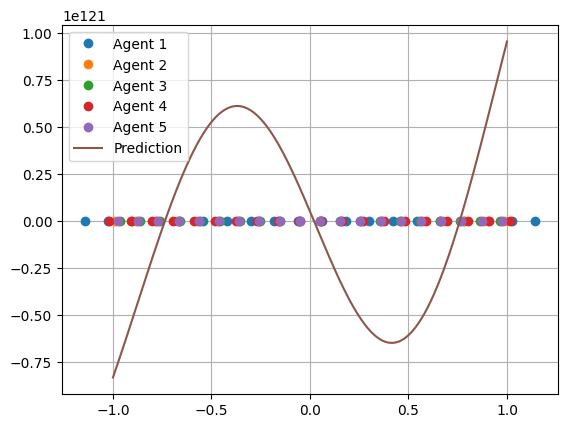

In [6]:
from fedAvg import *
a = 5
n = 100
m = 10
sigma = 0.5
mu = 0.1

with open('second_database.pkl', 'rb') as f:
    X, Y = pickle.load(f)
X = np.array(X)
Y = np.array(Y)

print("X shape : ", X.shape)
print("Y shape : ", Y.shape)
x_m_points=np.linspace(-1,1,m)

# Compute the alpha optimal
print("Compute the alpha optimal....")
start = time.time()
alpha_optim = compute_alpha(X.reshape(len(X)*X.shape[1]), Y.reshape(len(Y)*Y.shape[1]), x_m_points, sigma, mu)
end = time.time()
print(f'Time to compute alpha optimal : {end - start}\n')
print(f'alpha optimal : {alpha_optim}\n')

K = kernel_matrix(x_m_points, x_m_points)
Kim = []
for i in range(a):
    Kim.append(kernel_matrix(X[i], x_m_points))
print("K shape : ", K.shape)   
print("Kim shape : ", Kim[0].shape)

T = 200
E = 50
lr = 0.002
alpha_server, alpha_agents, alpha_agents_list, alpha_server_list  = fedAvg(
    X, Y, x_m_points, T, E, K, Kim, sigma, mu, lr)
# print("Alpha server : ", alpha_server)
# print("Alpha agents : ", alpha_agents)
visualize_predict(alpha_agents_list, alpha_optim, alpha_server, X, Y, x_m_points)